This code is used to do all the visualization of this project. It is used to plot the data and to create the animations. It is also used to create the plots for the report.

In [1]:
# global variables

basedir = '/Users/henryliu/Documents/GitHub/TiDE'
datadir = './data/ETDataset/ETT-small'

In [3]:
import pandas as pd
import os

# enter the basedir
os.chdir(basedir)
# open the ETTh1.csv file
df = pd.read_csv(os.path.join(datadir, 'ETTh1.csv'))
df

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000
...,...,...,...,...,...,...,...,...
17415,2018-06-26 15:00:00,-1.674,3.550,-5.615,2.132,3.472,1.523,10.904000
17416,2018-06-26 16:00:00,-5.492,4.287,-9.132,2.274,3.533,1.675,11.044000
17417,2018-06-26 17:00:00,2.813,3.818,-0.817,2.097,3.716,1.523,10.271000
17418,2018-06-26 18:00:00,9.243,3.818,5.472,2.097,3.655,1.432,9.778000


In [16]:
dates = [d.split()[0] for d in df['date']]
dates

['2016-07-01',
 '2016-07-01',
 '2016-07-01',
 '2016-07-01',
 '2016-07-01',
 '2016-07-01',
 '2016-07-01',
 '2016-07-01',
 '2016-07-01',
 '2016-07-01',
 '2016-07-01',
 '2016-07-01',
 '2016-07-01',
 '2016-07-01',
 '2016-07-01',
 '2016-07-01',
 '2016-07-01',
 '2016-07-01',
 '2016-07-01',
 '2016-07-01',
 '2016-07-01',
 '2016-07-01',
 '2016-07-01',
 '2016-07-01',
 '2016-07-02',
 '2016-07-02',
 '2016-07-02',
 '2016-07-02',
 '2016-07-02',
 '2016-07-02',
 '2016-07-02',
 '2016-07-02',
 '2016-07-02',
 '2016-07-02',
 '2016-07-02',
 '2016-07-02',
 '2016-07-02',
 '2016-07-02',
 '2016-07-02',
 '2016-07-02',
 '2016-07-02',
 '2016-07-02',
 '2016-07-02',
 '2016-07-02',
 '2016-07-02',
 '2016-07-02',
 '2016-07-02',
 '2016-07-02',
 '2016-07-03',
 '2016-07-03',
 '2016-07-03',
 '2016-07-03',
 '2016-07-03',
 '2016-07-03',
 '2016-07-03',
 '2016-07-03',
 '2016-07-03',
 '2016-07-03',
 '2016-07-03',
 '2016-07-03',
 '2016-07-03',
 '2016-07-03',
 '2016-07-03',
 '2016-07-03',
 '2016-07-03',
 '2016-07-03',
 '2016-07-

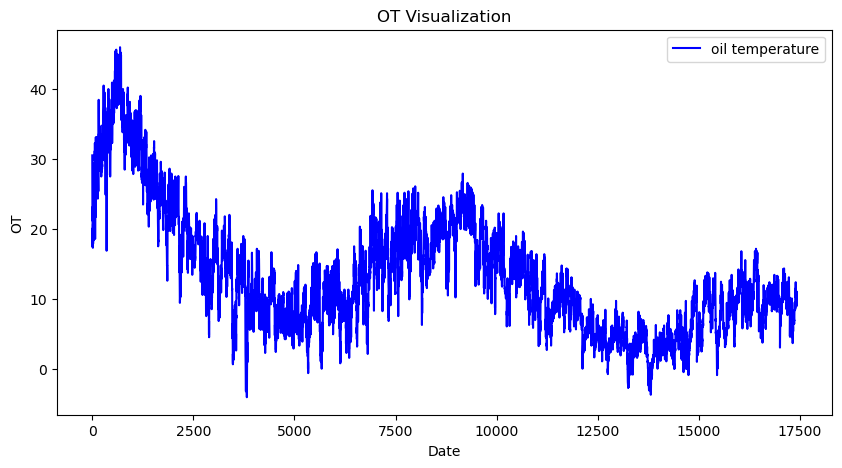

In [18]:
import matplotlib.pyplot as plt

# convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# visualize the OT column of the dataframe
plt.figure(figsize=(10, 5))  # set the figure size
plt.plot(df['OT'], linestyle='-', color='b', label='oil temperature')  # use only date information and add label
plt.xlabel('Date')  # add x-axis label
plt.ylabel('OT')  # add y-axis label
plt.title('OT Visualization')  # add plot title
plt.legend()  # add legend

# show the plot
plt.show()

In [37]:
from dataloader import *
from torch.utils.data import Dataset, DataLoader

# create a dataset object
set = Dataset_ETT_hour(root_path='/Users/henryliu/Documents/GitHub/TiDE/data/ETDataset/ETT-small', features='MS')
test_loader = DataLoader(set, batch_size=8, shuffle=False, num_workers=0)

In [38]:
len(test_loader)

1021

In [39]:
for i, (seq_x, seq_y, seq_x_mark, seq_y_mark) in enumerate(test_loader):
    print(seq_x.shape)
    print(seq_y.shape)
    print(seq_x_mark.shape)
    print(seq_y_mark.shape)
    print(seq_x[0, 0])
    print(seq_y[0, 0])
    print(seq_x_mark[0, 0])
    print(seq_y_mark[0, 0])

    # concatenate seq_x, 
    break

torch.Size([8, 384, 7])
torch.Size([8, 192, 1])
torch.Size([8, 384, 4])
torch.Size([8, 192, 4])
tensor([-0.3631, -0.0058, -0.6307, -0.1475,  1.3886,  0.8751,  1.4606],
       dtype=torch.float64)
tensor([2.1121], dtype=torch.float64)
tensor([7, 1, 4, 0])
tensor([ 7, 13,  2,  0])


In [43]:
import torch

batch_size = 8
# create a random tensor
x = torch.randn(batch_size, 3, 4)
y = torch.randn(batch_size, 3, 5)
print(x.shape, y.shape)
z = torch.cat((x, y), dim=2)
print(z.shape)

torch.Size([8, 3, 4]) torch.Size([8, 3, 5])
torch.Size([8, 3, 9])


In [44]:
fc = torch.nn.Linear(9, 1)
input = torch.randn(batch_size, 3, 9)
output = fc(input)
print(output.shape)

torch.Size([8, 3, 1])
